In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def get_mnist(limit = None):
    dt = pd.read_csv('C:\\Users\\Wei Guo\\Desktop\\data\\digit.csv')
    dt_value = dt.values
    X = dt_value[:,1:]
    Y = dt_value[:,0]
    if limit != None:
        X = X[:int(limit)]
        Y = Y[:int(limit)]
    return X,Y

In [7]:
class AutoEncoder:
    def __init__(self,D,M):
        self.X = tf.placeholder(tf.float32,shape=(None,D))
        #encode
        self.W1 = tf.Variable(tf.random_normal(shape=(D,M))/np.sqrt(M))
        self.b1 = tf.Variable(np.zeros(M).astype(np.float32))
        #decode
        self.W2 = tf.Variable(tf.random_normal(shape=(M,D))/np.sqrt(D))
        self.b2 = tf.Variable(np.zeros(D).astype(np.float32))
        #output
        self.z = tf.nn.relu(tf.matmul(self.X,self.W1) + self.b1)
        logit = tf.matmul(self.z,self.W2) + self.b2 #how about using softmax
        self.X_hat = tf.nn.sigmoid(logit)
        
        #cost
        self.cost = tf.reduce_sum(
            tf.nn.sigmoid_cross_entropy_with_logits(
                labels = self.X,
                logits = logit
            )
        )
        
        self.trainop = tf.train.RMSPropOptimizer(learning_rate=0.0001).minimize(self.cost)
        
        self.variable_op = tf.global_variables_initializer()
        self.sess = tf.InteractiveSession()
        self.sess.run(self.variable_op)
    
    def fit(self,X, epo = 30, batch_size = 60):
        costs = []
        batch_num = int(len(X)/batch_size)
        for i in range(epo):
            for j in range(batch_num):
                X_batch = X[int(j*batch_size):int(j*batch_size+batch_size)]
                _,c = self.sess.run((self.trainop,self.cost),feed_dict={self.X:X_batch})
                costs.append(c)
        plt.plot(costs)
        plt.show()
        
    def predict(self,X):
        return self.sess.run(self.X_hat,feed_dict={self.X:X})

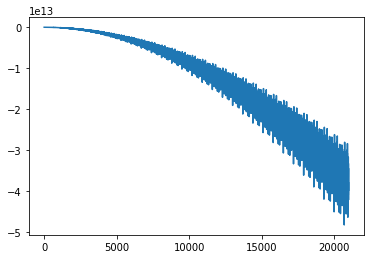

In [8]:
X,Y = get_mnist()
clf = AutoEncoder(784,200)
clf.fit(X)
